# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



<Axes: >

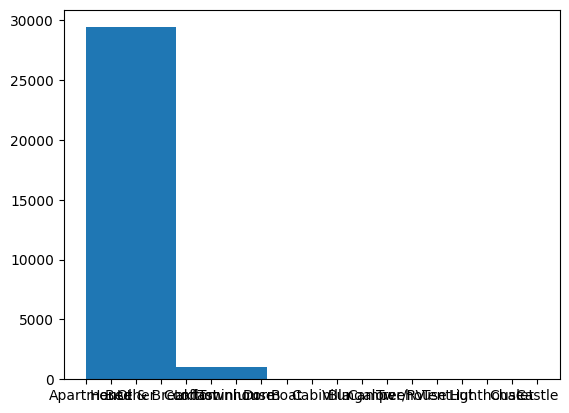

In [37]:
import numpy as np  # Import NumPy
import pandas as pd  # Import Pandas
import seaborn as sns # Import Seaborn

df = pd.read_csv('/home/airbnb_hw (1).csv') # Load the pretrial data
df.head()

price = df['Price']
# price.unique() # there are commas in the prices
price = price.str.replace(',','') # replace commas w/ empty str
price = pd.to_numeric(price,errors='coerce') # Typecast price to float/numeric
# print( price.unique() , '\n')
# print( 'Total missing: ', sum( price.isnull() ) )

# assign price back to the dataframe to update w/ clean vals
df['Price'] = price
df.drop(columns=['Review Scores Rating (bin)'], inplace=True) # dropped bin review scores
df.head()
#reviews = df['Review Scores Rating']

# drop host id, host since, name, number of records, number of reviews
df.drop(columns=['Host Id', 'Host Since', 'Name', 'Number of Records', 'Number Of Reviews'], inplace=True)
df.head(50)

# EDA
#df['Property Type'].hist(bins=5,grid=False)